# Implementacion del algoritmo de Page Rank
Utilizando la base de datos  de socslashdot una red social en la que se tienen dos columnas una que representa un nodo 
y la otra un nodo al cual hace referencia cada nodo puede hacer referencia a mas de un nodo cada columna con 70068 elementos

In [1]:
#Importamos scipy para moder manejar matrices dispersas y network por su modulo para crear matrices de adyacencia
from scipy.io import mmread
import pandas as pd 
import numpy as np
import networkx as nx
import scipy

### Implementacion con ejemplo pequeño ilustrativo usando matrices dispersas
Con fines ilustrativos decidi crear un set de datos pequeño para poder ir viendo cada una de las operaciones ya que con el set de datos real es muy complicado 

In [2]:
#Convertimos un txt a un df de pandas

datos3 = pd.read_csv("toy2.txt", skiprows=0, sep=",")
datos4 = datos3[["source","target"]]
datos4

,source,target
0,0,1
1,0,2
2,1,0
3,1,1


Usando la funcion de network x creamos un objeto digrapg que es un objeto que ilustra las relaciones en un set de datos y permite reconocer lo que buscamos que son nodos y relaciones

In [3]:
#Creamos el objeto digraph que permite establecer relaciones y nodos
#en donde le pasamos el nombre del dataframe y las columnas que queremos usar
G1 = nx.from_pandas_edgelist(datos4, "source", "target", edge_attr=True, create_using=nx.DiGraph())
type(G1)

networkx.classes.digraph.DiGraph

In [4]:
#Convertimos el objeto digraph en una matriz de adyacencia
A1 = nx.adjacency_matrix(G1) #Con el metodo adjacency_matrix
                             #Convertimos el Digraph en una matr
                             #de adyacencia que a su vez ya es una 
                             #matriz dispersa
print(A1.todense()) #El metodo todense nos permite rearmar la matriz 
                    #dispersa en una matriz densa nuevamente
type(A1)

[[0 1 1]
 [1 1 0]
 [0 0 0]]


scipy.sparse.csr.csr_matrix

In [5]:
#Una vez que obtenemos la matriz de adyacencia obtuvimos una nueva matriz llena de la suma  
#de los valores de las columnas y dividida entre ellos a la que llamaremos S1

S1 = scipy.sparse.csr_matrix(1/A1.sum(1)) 
print(S1.todense())

[[0.5]
 [0.5]
 [inf]]


C:\Users\mjsto\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Se tiene que resaltar que tenemos columnas cuya suma es cero entonces aqui nos lanza una advertencia ya que esos valores seran llenados con NaN o con inf

In [6]:
#multiplicamos la matriz S1 por la matriz de adyacencia y obtenemos nuestra matriz estocastica
CA = A1.multiply(S1)
print(CA.todense())

[[0.  0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]


En un principio no sabia si los NaN e inf afectarian a la matriz pero de primera mano no los afecto ya que al hacer la reconstruccion con '.todense' la reconstruyo sin problemas

Aun asi desarrolle un metodo para eliminar valores NaN

In [114]:
#Metodo para eliminar valores NaN
CA.data = np.nan_to_num(CA.data, copy=False)
print(CA.todense())

[[0.  0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]


Observamos que no existe diferencia pero debemos considerar que puede que no haya problema al reconstruirlas pero a la hora de operar con esas matrices siendo matrices dispersas puede que si lo haya 

### Resolviendo controversia de los NaN e INF

In [8]:
#Creamos una matriz pero ahora sin eliminar los NaN
G2 = nx.from_pandas_edgelist(datos4, "source", "target", edge_attr=True, create_using=nx.DiGraph())

A2 = nx.adjacency_matrix(G2)


S2 = scipy.sparse.csr_matrix(1/A2.sum(1))


C:\Users\mjsto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [9]:
CA2 = A2.multiply(S2)
print(CA.todense())

[[0.  0.5 0.5]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]


Definimos las Funciones para ejecutar el algortimo de pagerank con una ligera modificacion en la que incluyo una lista para guardar en un arrelgo la ultima iteracion 

In [31]:
#Definimos la funcion de pagerank convencional
import numpy as np
from scipy.sparse import csr_matrix

def pagerank1(M, iter=100):
  resultados = [] #definimos la lista para guardar la ultima iteracion
  n = M.shape[0]
  r = np.ones(n) / n
  for i in range(iter):
    
    
    resultados.append(r)
    print('Iteración {0}: r = {1}'.format(i,r))
    r = M @ r
    resultados.append(r) #llenamos la lista 
  return r
  return resultados #regresamos la lista
  

In [46]:
#Al igual que el algortimo anterior aqui ponemos una lista para guardar la ultima iteracion
def pagerank_escalable_css1(M, beta = 0.8, iter=20):
  resultados = []
  n = M.shape[0]
  r = np.ones(n) / n
  for i in range(iter):
    resultados.append(r)
    print('Iteración {0}: r = {1}'.format(i,r))
    rhat = beta * M @ r
    umrsn = (1 - rhat.sum()) / n
    r = rhat + umrsn
    resultados.append(r)
    
  return r

### PageRank con set de prueba

In [37]:
#Primero corremos la matriz de prueba con el metodo convencional de pagerank 
#y 20 iteraciones con la matriz que no tiene NaN
sinnan = pagerank1(CA, 20)

Iteración 0: r = [0.33333333 0.33333333 0.33333333]
Iteración 1: r = [0.33333333 0.33333333 0.        ]
Iteración 2: r = [0.16666667 0.33333333 0.        ]
Iteración 3: r = [0.16666667 0.25       0.        ]
Iteración 4: r = [0.125      0.20833333 0.        ]
Iteración 5: r = [0.10416667 0.16666667 0.        ]
Iteración 6: r = [0.08333333 0.13541667 0.        ]
Iteración 7: r = [0.06770833 0.109375   0.        ]
Iteración 8: r = [0.0546875  0.08854167 0.        ]
Iteración 9: r = [0.04427083 0.07161458 0.        ]
Iteración 10: r = [0.03580729 0.05794271 0.        ]
Iteración 11: r = [0.02897135 0.046875   0.        ]
Iteración 12: r = [0.0234375  0.03792318 0.        ]
Iteración 13: r = [0.01896159 0.03068034 0.        ]
Iteración 14: r = [0.01534017 0.02482096 0.        ]
Iteración 15: r = [0.01241048 0.02008057 0.        ]
Iteración 16: r = [0.01004028 0.01624552 0.        ]
Iteración 17: r = [0.00812276 0.0131429  0.        ]
Iteración 18: r = [0.00657145 0.01063283 0.        ]
Ite

In [43]:
#Una visualizacion de como se ve la ultima iteracion
sinnan

array([0.00430107, 0.00695928, 0.        ])

In [22]:
#Obtenemos el arreglo con los nodos en orden de
#importancia siendo el primero el menos importante y el ultimo el mas importante
np.argsort(sinnan)

array([2, 0, 1], dtype=int64)

In [20]:
#Corremos el algortimo con valores NaN
connan = pagerank1(CA2,20)


Iteración 0: r = [0.33333333 0.33333333 0.        ]
Iteración 1: r = [0.16666667 0.33333333 0.        ]
Iteración 2: r = [0.16666667 0.25       0.        ]
Iteración 3: r = [0.125      0.20833333 0.        ]
Iteración 4: r = [0.10416667 0.16666667 0.        ]
Iteración 5: r = [0.08333333 0.13541667 0.        ]
Iteración 6: r = [0.06770833 0.109375   0.        ]
Iteración 7: r = [0.0546875  0.08854167 0.        ]
Iteración 8: r = [0.04427083 0.07161458 0.        ]
Iteración 9: r = [0.03580729 0.05794271 0.        ]
Iteración 10: r = [0.02897135 0.046875   0.        ]
Iteración 11: r = [0.0234375  0.03792318 0.        ]
Iteración 12: r = [0.01896159 0.03068034 0.        ]
Iteración 13: r = [0.01534017 0.02482096 0.        ]
Iteración 14: r = [0.01241048 0.02008057 0.        ]
Iteración 15: r = [0.01004028 0.01624552 0.        ]
Iteración 16: r = [0.00812276 0.0131429  0.        ]
Iteración 17: r = [0.00657145 0.01063283 0.        ]
Iteración 18: r = [0.00531642 0.00860214 0.        ]
Ite

In [21]:
#Visualizamos el arreglo 
connan

array([0.00430107, 0.00695928, 0.        ])

In [23]:
#Visualizamos el orden de los nodos en orden ascendente
np.argsort(connan)

array([2, 0, 1], dtype=int64)

Despues de  aplicar el algoritmo de pagerank sobre las dos matrices una con nan y otra sin nan y vemos que los dos algoritmos arrojan los mismo resultados por lo que podemos concluir que los valores NaN no afectan a la hora de hacer las operaciones

### PageRank escalado con set de prueba

In [58]:
#Corremos el algoritmo de pagerank escalado con 20 iteraciones para matriz sin NaN
sinnanesc = pagerank_escalable_css1(csr_matrix(CA), 0.8, iter=20)

Iteración 0: r = [0.33333333 0.33333333 0.33333333]
Iteración 1: r = [0.42222222 0.42222222 0.15555556]
Iteración 2: r = [0.37481481 0.48148148 0.1437037 ]
Iteración 3: r = [0.38587654 0.47832099 0.13580247]
Iteración 4: r = [0.38187325 0.48190288 0.13622387]
Iteración 5: r = [0.38299698 0.48125674 0.13574628]
Iteración 6: r = [0.38263364 0.48153392 0.13583244]
Iteración 7: r = [0.38274202 0.4814625  0.13579548]
Iteración 8: r = [0.38270819 0.48148681 0.135805  ]
Iteración 9: r = [0.38271848 0.48147976 0.13580176]
Iteración 10: r = [0.38271531 0.481482   0.1358027 ]
Iteración 11: r = [0.38271628 0.48148132 0.1358024 ]
Iteración 12: r = [0.38271598 0.48148153 0.13580249]
Iteración 13: r = [0.38271607 0.48148147 0.13580246]
Iteración 14: r = [0.38271604 0.48148149 0.13580247]
Iteración 15: r = [0.38271605 0.48148148 0.13580247]
Iteración 16: r = [0.38271605 0.48148148 0.13580247]
Iteración 17: r = [0.38271605 0.48148148 0.13580247]
Iteración 18: r = [0.38271605 0.48148148 0.13580247]
Ite

In [61]:
#Observamos el vector 
sinnanesc

array([0.38271605, 0.48148148, 0.13580247])

In [62]:
#Ordenamos los nodos en orden de importancia 
np.argsort(sinnanesc)

array([2, 0, 1], dtype=int64)

In [59]:
#Corremos pagerank en la matriz con NaN 
connanesc = pagerank_escalable_css1(csr_matrix(CA2), 0.8, iter=20)

Iteración 0: r = [0.33333333 0.33333333 0.33333333]
Iteración 1: r = [0.42222222 0.42222222 0.15555556]
Iteración 2: r = [0.37481481 0.48148148 0.1437037 ]
Iteración 3: r = [0.38587654 0.47832099 0.13580247]
Iteración 4: r = [0.38187325 0.48190288 0.13622387]
Iteración 5: r = [0.38299698 0.48125674 0.13574628]
Iteración 6: r = [0.38263364 0.48153392 0.13583244]
Iteración 7: r = [0.38274202 0.4814625  0.13579548]
Iteración 8: r = [0.38270819 0.48148681 0.135805  ]
Iteración 9: r = [0.38271848 0.48147976 0.13580176]
Iteración 10: r = [0.38271531 0.481482   0.1358027 ]
Iteración 11: r = [0.38271628 0.48148132 0.1358024 ]
Iteración 12: r = [0.38271598 0.48148153 0.13580249]
Iteración 13: r = [0.38271607 0.48148147 0.13580246]
Iteración 14: r = [0.38271604 0.48148149 0.13580247]
Iteración 15: r = [0.38271605 0.48148148 0.13580247]
Iteración 16: r = [0.38271605 0.48148148 0.13580247]
Iteración 17: r = [0.38271605 0.48148148 0.13580247]
Iteración 18: r = [0.38271605 0.48148148 0.13580247]
Ite

In [60]:
#Observamos el vector 
connanesc

array([0.38271605, 0.48148148, 0.13580247])

In [63]:
#Ordenamos los nodos en orden de importancia
np.argsort(connanesc)

array([2, 0, 1], dtype=int64)

Podemos concluir que los valores NaN no afectan a las operaciones con las matrices pero que igual los valores de la ultima iteracion si cambian de un algortimo a otro aunque el orden de relevancia de los nodos no se ve afectada


## Ejemplo real

In [115]:
#Convertimos el archivo mtx a un df de pandas 
datos = pd.read_csv("socslashdot.mtx", skiprows=1, sep=" ")#La base de datos esta separada por espacios 
                                                           #y es el parametro que pasamos
datos2 = datos[["70068","70068.1"]]

In [117]:
datos2.head()

,70068,70068.1
0,2,1
1,3,1
2,4,1
3,5,1
4,6,1


Como podemos ver el set de datos tiene dos columnas la primer columna "70068" es el nodo origen y la columna "70068.1" es el nodo destino es decir el nodo al que apunta el nodo de la columna 70068 aqui anexo una representacion grafica de como luce el set de datos

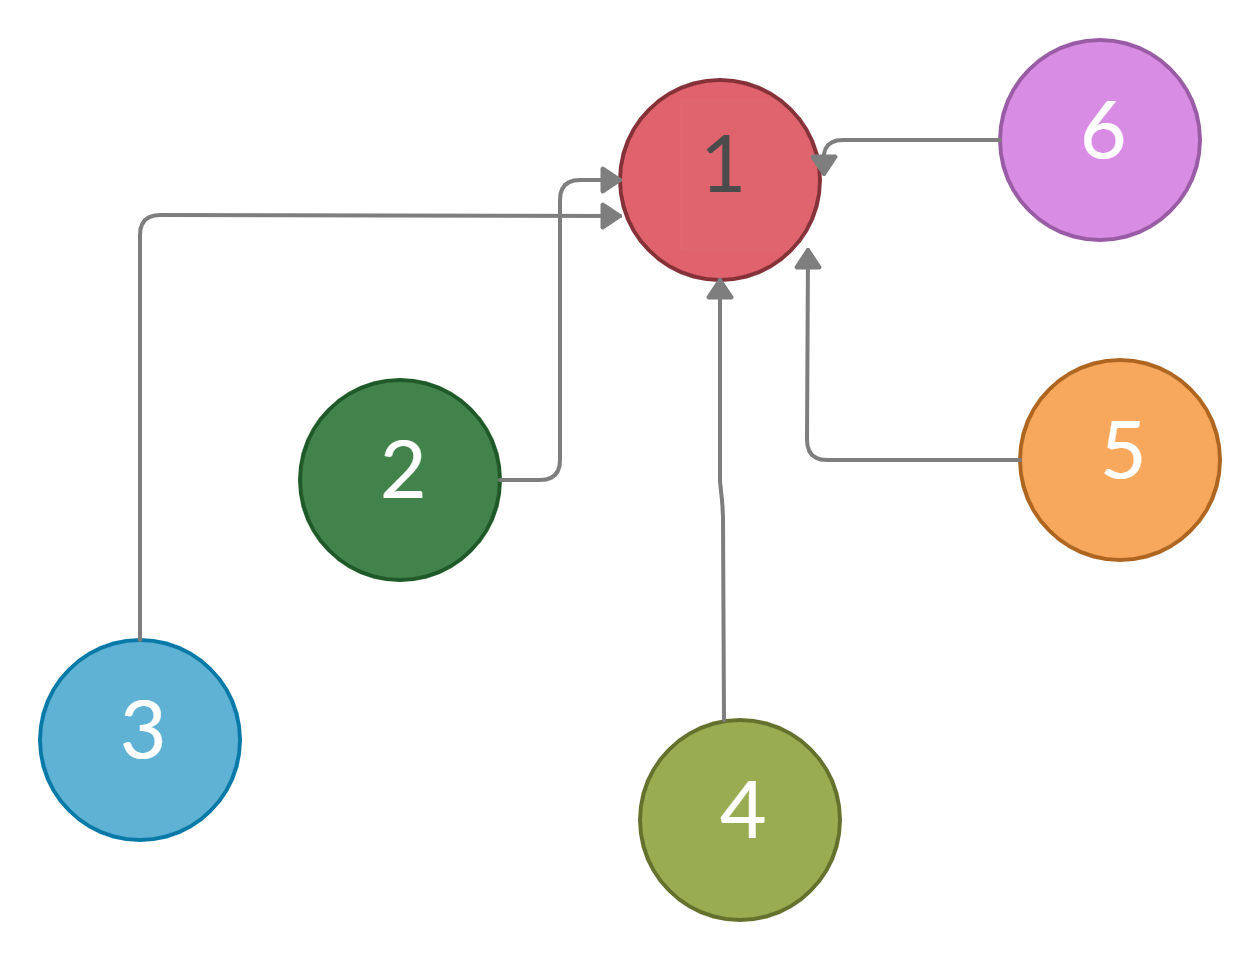

In [132]:
from IPython.display import Image
Image("diagrama.png")

In [78]:
#Obtenemos el valor que mas se repite en la columna de nodos referidos 
datos2["70068.1"].value_counts()

395      2027
2479     1914
378      1700
226      1640
35       1437
         ... 
18285       1
28520       1
8038        1
16226       1
58690       1
Name: 70068.1, Length: 28910, dtype: int64

Esto lo hice por que podriamos esperar que el valor que mas se repite en la columna de referidos fuera el mas relevante por lo que de momento quedaremos en que el nodo mas relevante es el 395 ya que es al que mas nodos refieren

In [89]:
#Utilizando la base de datos creamos un objeto digraph apartir del df que tenemos
G = nx.from_pandas_edgelist(datos2, "70068.1", "70068", edge_attr=True, create_using=nx.DiGraph())
type(G)

networkx.classes.digraph.DiGraph

In [118]:
#Creamos una matriz de adyacencia apartir de nuestro objeto 
A = nx.adjacency_matrix(G)
print(A.todense())
A.shape


[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


(70068, 70068)

Podemos ver que es una matriz de 70068 x70068

In [91]:
#Obtenemos la matriz que contiene la suma de las columnas de la matriz de adyacencia 
S = scipy.sparse.csr_matrix(1/A.sum(1))

C:\Users\mjsto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [92]:
#Creamos una nueva matriz apartir de la multiplicacion de la matriz de adyacencia por la matriz de valores suma
#y asi obtener la matriz estocastica
MA = A.multiply(S)


In [ ]:
MA.data = np.nan_to_num(MA.data, copy=False)

In [93]:
#Tratamos de imprimir la matriz estocastica 
print(MA.todense())

MemoryError: Unable to allocate 36.6 GiB for an array with shape (70068, 70068) and data type float64

Aqui vemos un error bastante interesante que es que no se puede representar la matriz ya que es muy grande y no tenemos la memoria ram suficiente para llevar acabo el proceso ya que requerimos 36.6 gb por lo que no podemos visualizar como luce la matriz pero tomando como base los ejemplos de prueba podemos darnos una idea y como ya comprobamos que no existe ningun problema al usar valores NaN entonces no es de suma importancia saber como luce la matriz 

## PageRank

Ahora implementamos el algoritmo de pagerank normal solo llamando nuestra funcion y pasandole la matriz dispersa que ya habiamos construido llamada MA

In [97]:
#Corremos con 100 iteraciones
real = pagerank1(MA, 100)

Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 0.00000000e+00
 1.42718502e-05 0.00000000e+00]
Iteración 2: r = [1.35954592e-05 1.41713442e-05 1.42718502e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 3: r = [1.27152564e-05 1.22204316e-05 1.28771213e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 4: r = [1.05325596e-05 8.77588088e-06 9.96700631e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 5: r = [7.06056276e-06 4.98473195e-06 6.50321028e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 6: r = [4.00659030e-06 2.38672102e-06 3.56353666e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 7: r = [1.90391237e-06 9.74205705e-07 1.68155850e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 8: r = [8.03338858e-07 3.49274418e-07 6.89827964e-07 ... 0.00000000e+00
 0.000

In [124]:
#visualizamos la ultima iteracion del arreglo  
real.shape
real
print("El arreglo luce:", real, "Mide:", real.shape)

El arreglo luce: [5.40032486e-115 4.49258324e-116 2.81097339e-115 ... 0.00000000e+000
 0.00000000e+000 0.00000000e+000] Mide: (70068,)


In [99]:
#Ordenamos los nodos deacuerdo a la ultima iteracion
np.argsort(real)

array([35033, 46703, 46704, ...,    64,     2,     0], dtype=int64)

In [100]:
#Corremos el ultimo algoritmo pero ahora con solo 20 iteraciones
real2 = pagerank1(MA, 20)

Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 0.00000000e+00
 1.42718502e-05 0.00000000e+00]
Iteración 2: r = [1.35954592e-05 1.41713442e-05 1.42718502e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 3: r = [1.27152564e-05 1.22204316e-05 1.28771213e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 4: r = [1.05325596e-05 8.77588088e-06 9.96700631e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 5: r = [7.06056276e-06 4.98473195e-06 6.50321028e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 6: r = [4.00659030e-06 2.38672102e-06 3.56353666e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 7: r = [1.90391237e-06 9.74205705e-07 1.68155850e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Iteración 8: r = [8.03338858e-07 3.49274418e-07 6.89827964e-07 ... 0.00000000e+00
 0.000

In [101]:
#Visualizamos como luce la relevancia de nodos
np.argsort(real2)

array([35033, 46708, 46709, ...,    76,   101,   146], dtype=int64)

Podemos observar que aunque el algoritmo es el mismo la relevancia de los nodos cambio rotundamente  al correrlo solo con 20 iteraciones vemos que ahora el nodo mas importante es el 146 y no el nodo 0 como con 100 iteraciones

## PageRank Escalado 

### PageRank Escalado con lambda de 0.8

In [105]:
#Corremos el algortimo pagerank pero ahora usando su variante escalada primero con 100 iteraciones y una lambda de 0.8
realesca = pagerank_escalable_css1(csr_matrix(MA), 0.8, iter=100)

Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [2.09784873e-05 2.09784873e-05 2.09784873e-05 ... 9.56100714e-06
 2.09784873e-05 9.56100714e-06]
Iteración 2: r = [2.53565440e-05 2.57251105e-05 2.57894343e-05 ... 9.00664444e-06
 1.66554502e-05 9.00664444e-06]
Iteración 3: r = [2.85917741e-05 2.85853341e-05 2.89646510e-05 ... 9.04720481e-06
 1.62525204e-05 9.04720481e-06]
Iteración 4: r = [3.04907837e-05 2.98341175e-05 3.05878399e-05 ... 9.08649334e-06
 1.63242572e-05 9.08649334e-06]
Iteración 5: r = [3.11992043e-05 3.01107221e-05 3.11881015e-05 ... 9.10203358e-06
 1.63712283e-05 9.10203358e-06]
Iteración 6: r = [3.13758024e-05 3.01154475e-05 3.13192645e-05 ... 9.10468873e-06
 1.63863156e-05 9.10468873e-06]
Iteración 7: r = [3.13797504e-05 3.00886668e-05 3.13220534e-05 ... 9.10412746e-06
 1.63878784e-05 9.10412746e-06]
Iteración 8: r = [3.13682008e-05 3.00776676e-05 3.13103771e-05 ... 9.10368079e-06
 1.638

 1.63864102e-05 9.10356120e-06]
Iteración 85: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 86: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 87: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 88: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 89: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 90: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 91: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 92: r = [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06]
Iteración 93: r = [3.13619780e-05 3.00765969e-05

In [125]:
#Observamos como luce el arreglo de la ultima iteracion y su tamaño
print("El arreglo luce:", realesca, "\nMide:", realesca.shape)


El arreglo luce: [3.13619780e-05 3.00765969e-05 3.13051424e-05 ... 9.10356120e-06
 1.63864102e-05 9.10356120e-06] 
Mide: (70068,)


In [126]:
#Ordenamos en orden de relevancia y observamos que con este algoritmo el nodo mas importante es el 5980
np.argsort(realesca)

array([35033, 45862, 45863, ..., 16213, 12219,  5980], dtype=int64)

In [127]:
#Mismo algoritmo pero ahora con solo 20 iteraciones
realesca2 = pagerank_escalable_css1(csr_matrix(MA), 0.8, iter=20)


Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [2.09784873e-05 2.09784873e-05 2.09784873e-05 ... 9.56100714e-06
 2.09784873e-05 9.56100714e-06]
Iteración 2: r = [2.53565440e-05 2.57251105e-05 2.57894343e-05 ... 9.00664444e-06
 1.66554502e-05 9.00664444e-06]
Iteración 3: r = [2.85917741e-05 2.85853341e-05 2.89646510e-05 ... 9.04720481e-06
 1.62525204e-05 9.04720481e-06]
Iteración 4: r = [3.04907837e-05 2.98341175e-05 3.05878399e-05 ... 9.08649334e-06
 1.63242572e-05 9.08649334e-06]
Iteración 5: r = [3.11992043e-05 3.01107221e-05 3.11881015e-05 ... 9.10203358e-06
 1.63712283e-05 9.10203358e-06]
Iteración 6: r = [3.13758024e-05 3.01154475e-05 3.13192645e-05 ... 9.10468873e-06
 1.63863156e-05 9.10468873e-06]
Iteración 7: r = [3.13797504e-05 3.00886668e-05 3.13220534e-05 ... 9.10412746e-06
 1.63878784e-05 9.10412746e-06]
Iteración 8: r = [3.13682008e-05 3.00776676e-05 3.13103771e-05 ... 9.10368079e-06
 1.638

In [107]:
#Observamos el orden de relevancia 
np.argsort(realesca2)

array([35033, 45862, 45863, ..., 16213, 12219,  5980], dtype=int64)

Observamos que el algoritmo de pagerank difiere enormemente del algoritmo de pagerank escalado en cuanto a cuales son los nodos mas importantes ya que ahora el mas importante es el 5980
Tambien observamos que el algoritmo de pagerank no se ve afectada en cuanto al numero de iteraciones si conservamos la misma lambda

### PageRank con lambda de 0.9

In [128]:
#corremos el algortimo de pagerank solo llamando la funcion y cambiando la lambda a 0.9 y con 20 iteraciones
realesca3 = pagerank_escalable_css1(csr_matrix(MA), 0.9, iter=20)

Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [2.18168169e-05 2.18168169e-05 2.18168169e-05 ... 8.97215176e-06
 2.18168169e-05 8.97215176e-06]
Iteración 2: r = [2.73577950e-05 2.78242619e-05 2.79056717e-05 ... 8.27053647e-06
 1.63454731e-05 8.27053647e-06]
Iteración 3: r = [3.19642066e-05 3.18967287e-05 3.24266346e-05 ... 8.32828745e-06
 1.57717703e-05 8.32828745e-06]
Iteración 4: r = [3.50060527e-05 3.38970383e-05 3.50266694e-05 ... 8.39122009e-06
 1.58866788e-05 8.39122009e-06]
Iteración 5: r = [3.62826496e-05 3.43954887e-05 3.61083602e-05 ... 8.41922410e-06
 1.59713222e-05 8.41922410e-06]
Iteración 6: r = [3.66406647e-05 3.44050685e-05 3.63742653e-05 ... 8.42460686e-06
 1.60019086e-05 8.42460686e-06]
Iteración 7: r = [3.66496688e-05 3.43439897e-05 3.63806258e-05 ... 8.42332677e-06
 1.60054729e-05 8.42332677e-06]
Iteración 8: r = [3.66200349e-05 3.43157682e-05 3.63506670e-05 ... 8.42218072e-06
 1.600

In [129]:
#Visualizamos el arreglo 
np.argsort(realesca3)

array([35033, 45862, 45863, ..., 12219, 16213,  5980], dtype=int64)

In [112]:
#El mismo algortimo pero ahora con 100 iteraciones y la misma lambda 
realesca4 = pagerank_escalable_css1(csr_matrix(MA), 0.9, iter=100)


Iteración 0: r = [1.42718502e-05 1.42718502e-05 1.42718502e-05 ... 1.42718502e-05
 1.42718502e-05 1.42718502e-05]
Iteración 1: r = [2.18168169e-05 2.18168169e-05 2.18168169e-05 ... 8.97215176e-06
 2.18168169e-05 8.97215176e-06]
Iteración 2: r = [2.73577950e-05 2.78242619e-05 2.79056717e-05 ... 8.27053647e-06
 1.63454731e-05 8.27053647e-06]
Iteración 3: r = [3.19642066e-05 3.18967287e-05 3.24266346e-05 ... 8.32828745e-06
 1.57717703e-05 8.32828745e-06]
Iteración 4: r = [3.50060527e-05 3.38970383e-05 3.50266694e-05 ... 8.39122009e-06
 1.58866788e-05 8.39122009e-06]
Iteración 5: r = [3.62826496e-05 3.43954887e-05 3.61083602e-05 ... 8.41922410e-06
 1.59713222e-05 8.41922410e-06]
Iteración 6: r = [3.66406647e-05 3.44050685e-05 3.63742653e-05 ... 8.42460686e-06
 1.60019086e-05 8.42460686e-06]
Iteración 7: r = [3.66496688e-05 3.43439897e-05 3.63806258e-05 ... 8.42332677e-06
 1.60054729e-05 8.42332677e-06]
Iteración 8: r = [3.66200349e-05 3.43157682e-05 3.63506670e-05 ... 8.42218072e-06
 1.600

 1.60015099e-05 8.42184730e-06]
Iteración 83: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 84: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 85: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 86: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 87: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 88: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 89: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 90: r = [3.66020998e-05 3.43131498e-05 3.63356316e-05 ... 8.42184730e-06
 1.60015099e-05 8.42184730e-06]
Iteración 91: r = [3.66020998e-05 3.43131498e-05

In [130]:
#visualizamos el arreglo para saber la relevancia 
np.argsort(realesca4)

array([35033, 45862, 45863, ..., 12219, 16213,  5980], dtype=int64)

Observamos que el valor no difiere ni cuando le cambiamos la lambda ni cuando le cambiamos el numero de iteraciones usando el algortimo de pagerank 
por lo que podemos deducir que algoritmo es muy estable